In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas

2023-11-22 00:08:02.305875: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 00:08:02.334725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
train_file = "../train.tsv"
test_file = "../test.tsv"

train_data = pandas.read_csv(train_file, delimiter='\t').to_numpy()
train_data2 = np.empty((train_data.shape[0], train_data.shape[1]-2))
train_data2[:, 0:] = train_data[:, 2:]
train_data2[:,0:1] = train_data2[:,0:1] / 4.0   #季節を0～1に正規化
train_data2[:,2:3] = train_data2[:, 2:3] / 6.0 #月を0～2に正規化
train_data2[:,3:4] = train_data2[:, 3:4] / 11.5 #時間を0～2に正規化
train_data2[:,5:6] = train_data2[:,5:6] / 6.0   #曜日を0～1に正規化
train_data2[:,7:8] = train_data2[:,7:8] / 4.0   #天気を0～1に正規化
train_data2 = train_data2#.astype(np.float32)
rnd = np.random.default_rng()
rnd.shuffle(train_data2,axis=0)

test_data = pandas.read_csv(test_file, delimiter='\t').to_numpy()
test_data2 = np.empty((test_data.shape[0], test_data.shape[1]-2))
test_data2[:, 0:] = test_data[:, 2:]
test_data2[:,0:1] = test_data2[:,0:1] / 4.0   #季節を0～1に正規化
test_data2[:,2:3] = test_data2[:, 2:3] / 6.0 #月を0～2に正規化
test_data2[:,3:4] = test_data2[:, 3:4] / 11.5 #時間を0～2に正規化
test_data2[:,5:6] = test_data2[:,5:6] / 6.0   #曜日を0～1に正規化
test_data2[:,7:8] = test_data2[:,7:8] / 4.0   #天気を0～1に正規化
test_data2 = test_data2.astype(np.float32)

display(train_data2)
display(test_data2)

x = train_data2[:, 12:]
x = x.reshape(x.shape[0], 1)
#print(x)
y = train_data2[:, :12]
y = y.reshape(y.shape[0], y.shape[1], 1)
#print(y)
test_y = test_data2.reshape(test_data2.shape[0], test_data2.shape[1], 1)
z = test_data2[:, :12]
z = z.reshape(z.shape[0], z.shape[1], 1)

array([[2.50000000e-01, 0.00000000e+00, 5.00000000e-01, ...,
        5.00000000e-01, 2.53700000e-01, 2.28000000e+02],
       [1.00000000e+00, 0.00000000e+00, 1.66666667e+00, ...,
        7.60000000e-01, 0.00000000e+00, 3.15000000e+02],
       [2.50000000e-01, 0.00000000e+00, 1.66666667e-01, ...,
        5.50000000e-01, 4.47800000e-01, 3.30000000e+01],
       ...,
       [5.00000000e-01, 0.00000000e+00, 8.33333333e-01, ...,
        8.30000000e-01, 1.64200000e-01, 2.00000000e+01],
       [5.00000000e-01, 0.00000000e+00, 8.33333333e-01, ...,
        5.60000000e-01, 0.00000000e+00, 2.26000000e+02],
       [2.50000000e-01, 0.00000000e+00, 5.00000000e-01, ...,
        4.90000000e-01, 3.58200000e-01, 1.95000000e+02]])

array([[0.25      , 1.        , 0.16666667, ..., 0.3788    , 0.66      ,
        0.        ],
       [0.25      , 1.        , 0.16666667, ..., 0.3485    , 0.66      ,
        0.1343    ],
       [0.25      , 1.        , 0.16666667, ..., 0.3485    , 0.76      ,
        0.        ],
       ...,
       [0.25      , 1.        , 2.        , ..., 0.2576    , 0.6       ,
        0.1642    ],
       [0.25      , 1.        , 2.        , ..., 0.2727    , 0.56      ,
        0.1343    ],
       [0.25      , 1.        , 2.        , ..., 0.2727    , 0.65      ,
        0.1343    ]], dtype=float32)

In [3]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 1024  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加 #増やした

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

2023-11-22 00:08:04.150726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 00:08:04.163221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 00:08:04.163261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 00:08:04.165607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 00:08:04.165639: I tensorflow/compile

In [4]:
y.shape

(8645, 12, 1)

In [19]:
ES = EarlyStopping(mode='auto', patience=32)
model.fit(y, x,
          batch_size=32, #デフォは32
          epochs=512, #512epochで学習
          validation_split=0.2, #学習データの5%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/512
217/217 [==============================] - 2s 8ms/step - loss: 441.4375 - accuracy: 0.0129 - val_loss: 1278.8267 - val_accuracy: 0.0069
Epoch 2/512
217/217 [==============================] - 1s 6ms/step - loss: 382.7676 - accuracy: 0.0121 - val_loss: 1414.5731 - val_accuracy: 0.0087
Epoch 3/512
217/217 [==============================] - 1s 6ms/step - loss: 435.2241 - accuracy: 0.0126 - val_loss: 1296.4739 - val_accuracy: 0.0087
Epoch 4/512
217/217 [==============================] - 1s 6ms/step - loss: 424.8884 - accuracy: 0.0123 - val_loss: 1347.0547 - val_accuracy: 0.0087
Epoch 5/512
217/217 [==============================] - 1s 7ms/step - loss: 424.7982 - accuracy: 0.0121 - val_loss: 1275.7462 - val_accuracy: 0.0087
Epoch 6/512
217/217 [==============================] - 1s 6ms/step - loss: 417.5361 - accuracy: 0.0124 - val_loss: 1265.6678 - val_accuracy: 0.0087
Epoch 7/512
217/217 [==============================] - 1s 6ms/step - loss: 395.5107 - accuracy: 0.0124 - val_los

In [20]:
predicted = model.predict(y,batch_size=32)
model.evaluate(y,x,batch_size=32)

271/271 [==============================] - 1s 3ms/step - loss: 770.5193 - accuracy: 0.0098


[770.519287109375, 0.009832273237407207]

In [21]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.9569537494377606


In [22]:
predicted

array([[101.67854],
       [228.0278 ],
       [163.46931],
       ...,
       [176.64027],
       [392.7583 ],
       [204.2751 ]], dtype=float32)

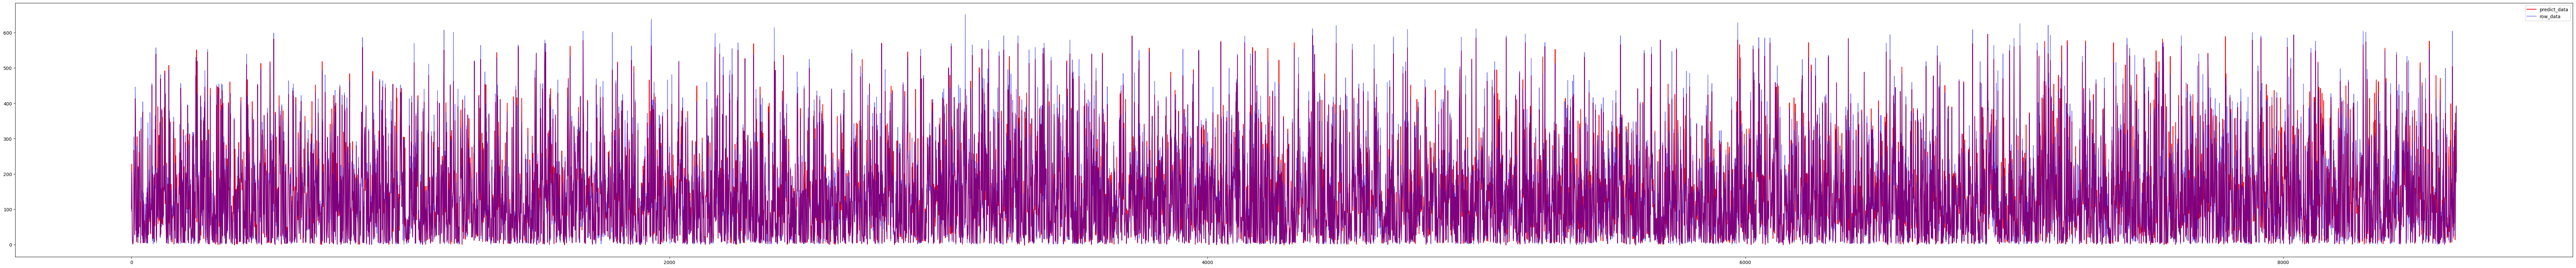

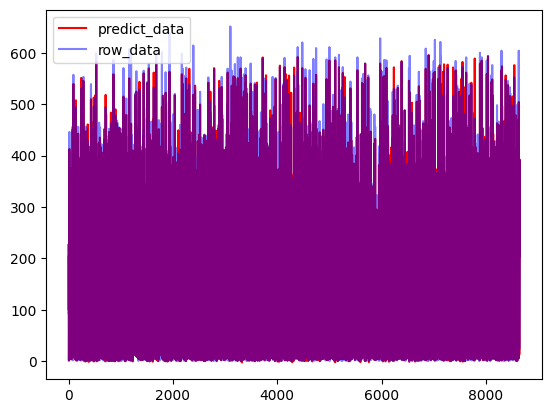

In [23]:
plt.figure(figsize=(100,10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()

plt.figure()
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()

273/273 [==============================] - 1s 3ms/step
[[16]
 [ 5]
 [ 0]
 ...
 [66]
 [62]
 [50]]
(8734, 1)


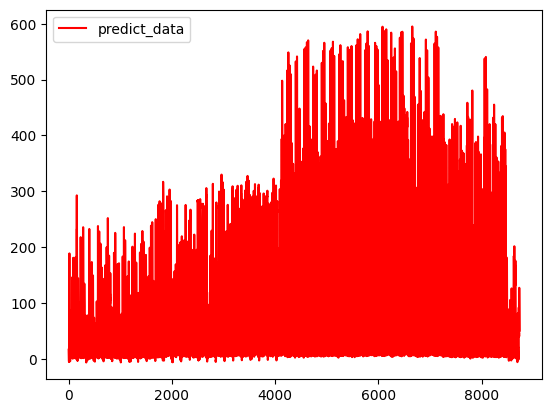

In [41]:
predictedz = model.predict(z,batch_size=32)
zzzzzz = predictedz.astype("int32")
print(zzzzzz)
#for i in range(0,8733):
#    print(zzzzzz[i,0])
print(np.shape(zzzzzz))

plt.figure()
plt.plot(range(0,len(zzzzzz)),predicted, color="r", label="predict_data")
plt.legend()
plt.show()